In [213]:
import random
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd
from numpy import random
random.seed(0)

In [214]:

# 正规化数据集 X
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)


# 计算一个样本与数据集中所有样本的欧氏距离的平方
def euclidean_distance(one_sample, X):
    one_sample = one_sample.reshape(1, -1)
    X = X.reshape(X.shape[0], -1)
    distances = np.power(np.tile(one_sample, (X.shape[0], 1)) - X, 2).sum(axis=1)
    return distances



class Kmeans():
    """Kmeans聚类算法.

    Parameters:
    -----------
    k: int
        聚类的数目.
    max_iterations: int
        最大迭代次数.
    varepsilon: float
        判断是否收敛, 如果上一次的所有k个聚类中心与本次的所有k个聚类中心的差都小于varepsilon,
        则说明算法已经收敛
    """
    def __init__(self, k=2, max_iterations=500, varepsilon=0.0001):
        self.k = k
        self.max_iterations = max_iterations
        self.varepsilon = varepsilon

    # 从所有样本中随机选取self.k样本作为初始的聚类中心
    def init_random_centroids(self, X):
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    # 返回距离该样本最近的一个中心索引[0, self.k)
    def _closest_centroid(self, sample, centroids):
        distances = euclidean_distance(sample, centroids)
        closest_i = np.argmin(distances)
        return closest_i

    # 将所有样本进行归类，归类规则就是将该样本归类到与其最近的中心
    def create_clusters(self, centroids, X):
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    # 对中心进行更新
    def update_centroids(self, clusters, X):
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    # 将所有样本进行归类，其所在的类别的索引就是其类别标签
    def get_cluster_labels(self, clusters, X):
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    # 对整个数据集X进行Kmeans聚类，返回其聚类的标签
    def predict(self, X):
        # 从所有样本中随机选取self.k样本作为初始的聚类中心
        centroids = self.init_random_centroids(X)

        # 迭代，直到算法收敛(上一次的聚类中心和这一次的聚类中心几乎重合)或者达到最大迭代次数
        for _ in range(self.max_iterations):
            # 将所有进行归类，归类规则就是将该样本归类到与其最近的中心
            clusters = self.create_clusters(centroids, X)
            former_centroids = centroids

            # 计算新的聚类中心
            centroids = self.update_centroids(clusters, X)

            # 如果聚类中心几乎没有变化，说明算法已经收敛，退出迭代
            diff = centroids - former_centroids
            if diff.any() < self.varepsilon:
                break

        return self.get_cluster_labels(clusters, X)


## sk-learn 数据集测试

In [215]:
def main():
    # Load the dataset
    X, y = datasets.make_blobs(n_samples=10000,
                               n_features=3,
                               centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]],
                               cluster_std=[0.2, 0.1, 0.2, 0.2],
                               random_state =9)

    # 用Kmeans算法进行聚类
    clf = Kmeans(k=4)
    y_pred = clf.predict(X)
    print(len(y_pred))


    # 可视化聚类效果
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection='3d')
    # ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
    ax.scatter3D(X[y_pred==0][:, 0], X[y_pred==0][:, 1], X[y_pred==0][:, 2])
    ax.scatter3D(X[y_pred==1][:, 0], X[y_pred==1][:, 1], X[y_pred==1][:, 2])
    ax.scatter3D(X[y_pred==2][:, 0], X[y_pred==2][:, 1], X[y_pred==2][:, 2])
    ax.scatter3D(X[y_pred==3][:, 0], X[y_pred==3][:, 1], X[y_pred==3][:, 2])
    plt.show()

## 初始中心点随机选择的影响 (`sklearn` 数据集)

10000


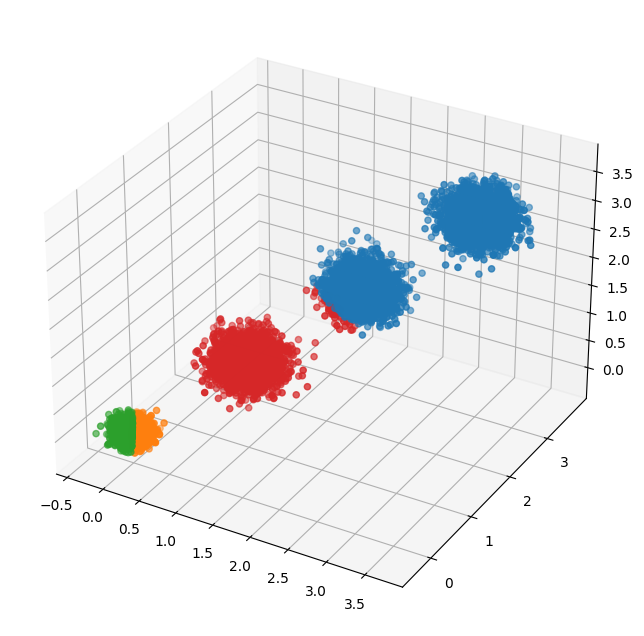

In [216]:
# RUN 1
main()

10000


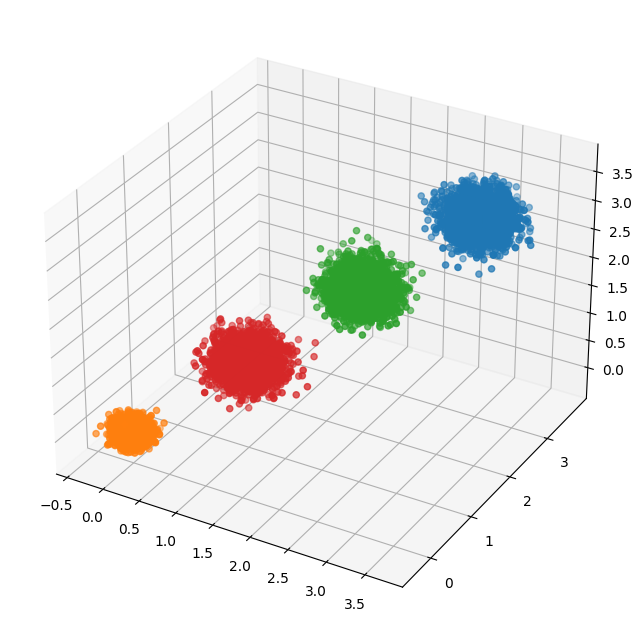

In [217]:
#RUN 2
main()

10000


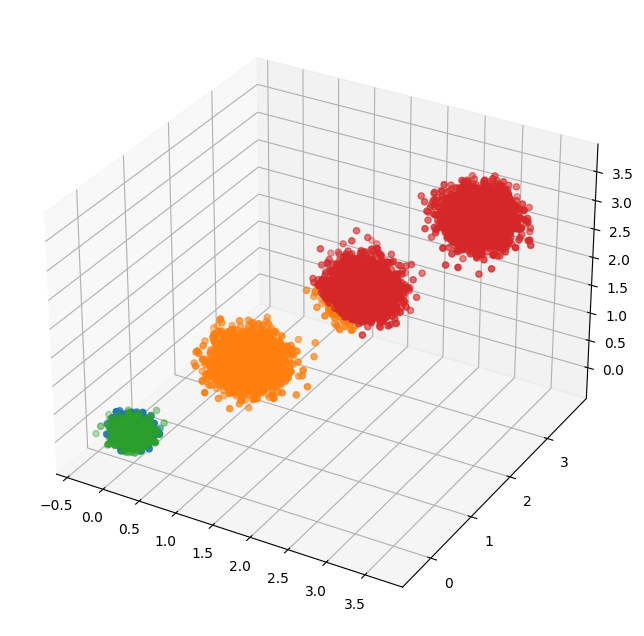

In [218]:
# RUN 3
main()

## 泰国数据集测试

In [219]:
names = ['status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes','num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'final_time', 'new_reaction_count','postive_reactions',
       'negative_reactions','interesting']

# 未标准化
data_clean = pd.read_csv('clean.csv', index_col=0)
X = np.array(data_clean.iloc[:, 3:])


# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 泰国数据集 Kmeans 聚类执行

1. 原来数据集 1 种类和 3 种类太多且分布不集中，聚类没太大效果（（
2. Kmeans 预测出来的标签和原来的标签*不是* 一一对应的

In [220]:
def inference(X):
    """K-means inference"""
    clf = Kmeans(k=5)
    y_pred = clf.predict(X)
    print(f"Total sample: {len(y_pred)}")
    for i in range(5):
        print(f"Type {i}: {(y_pred == i).sum()}")
    return y_pred

In [221]:
# 未标准化
y_pred = inference(X)

# 标准化
y_pred_scaled = inference(X_scaled)

Total sample: 7050
Type 0: 1579
Type 1: 4631
Type 2: 350
Type 3: 291
Type 4: 199
Total sample: 7050
Type 0: 752
Type 1: 71
Type 2: 384
Type 3: 4545
Type 4: 1298


## 泰国数据集可视化(2D)

`2D`, `3D` 可视化可修改 `typeX_id` 修改可视化的特征，当前展示特征 `id` 为 `0, 1, 2` (对应 `names` 数组)

In [222]:
def main_custom_2d(X, y_pred, type1_id, type2_id, x_lim, y_lim, figsize):
    """
    Designed for our dataset - 5 categories

    Args:
        X: dataset
        y_pred: inferenced result
        typeX_id: index of features in X(start from index 3 in `names`)
        X_lim: X axis ranging
        figsize: size of figure

    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes()
    ax.set_xlim(*x_lim)
    ax.set_ylim(*y_lim)
    ax.scatter(X[y_pred==0][:, type1_id], X[y_pred==0][:, type2_id])
    ax.scatter(X[y_pred==1][:, type1_id], X[y_pred==1][:, type2_id])
    ax.scatter(X[y_pred==2][:, type1_id], X[y_pred==2][:, type2_id])
    ax.scatter(X[y_pred==3][:, type1_id], X[y_pred==3][:, type2_id])
    ax.scatter(X[y_pred==4][:, type1_id], X[y_pred==4][:, type2_id])
    plt.title('Custom Dataset')
    ax.set_xlabel(names[3 + type1_id])
    ax.set_ylabel(names[3 + type2_id])

    plt.legend([f'type{i}' for i in range(5)])

    plt.show()

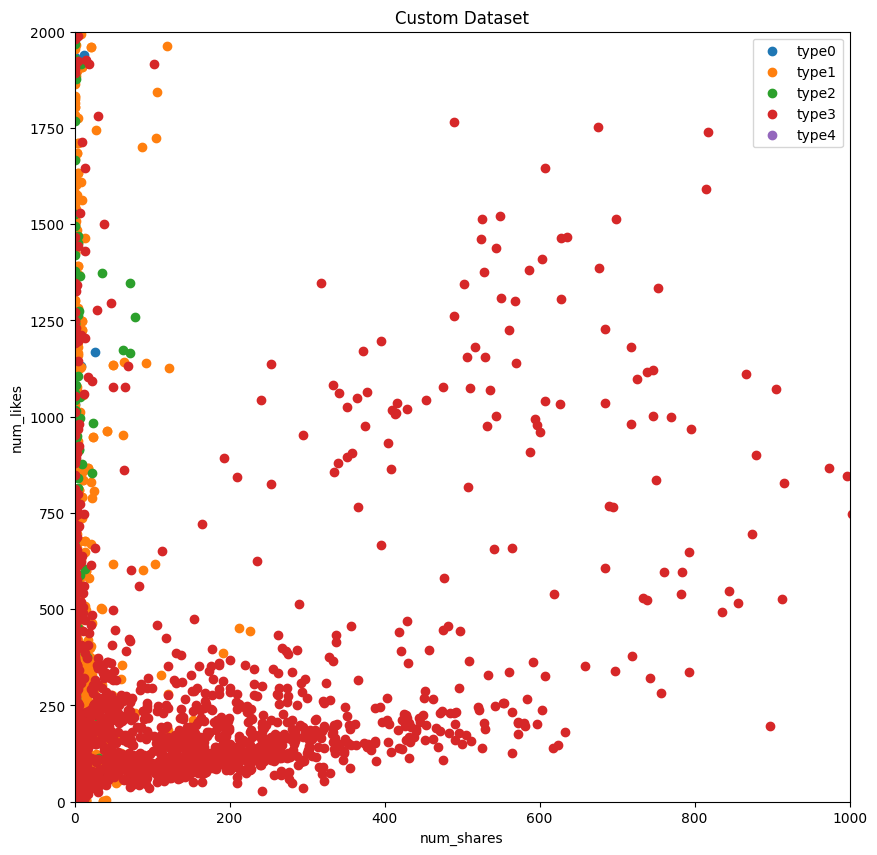

In [223]:
# 原始数据集
main_custom_2d(X=X, y_pred=np.array(data_clean['status_type']), type1_id=0, type2_id=1,
            x_lim=(0, 1000), y_lim=(0, 2000), figsize=(10, 10))

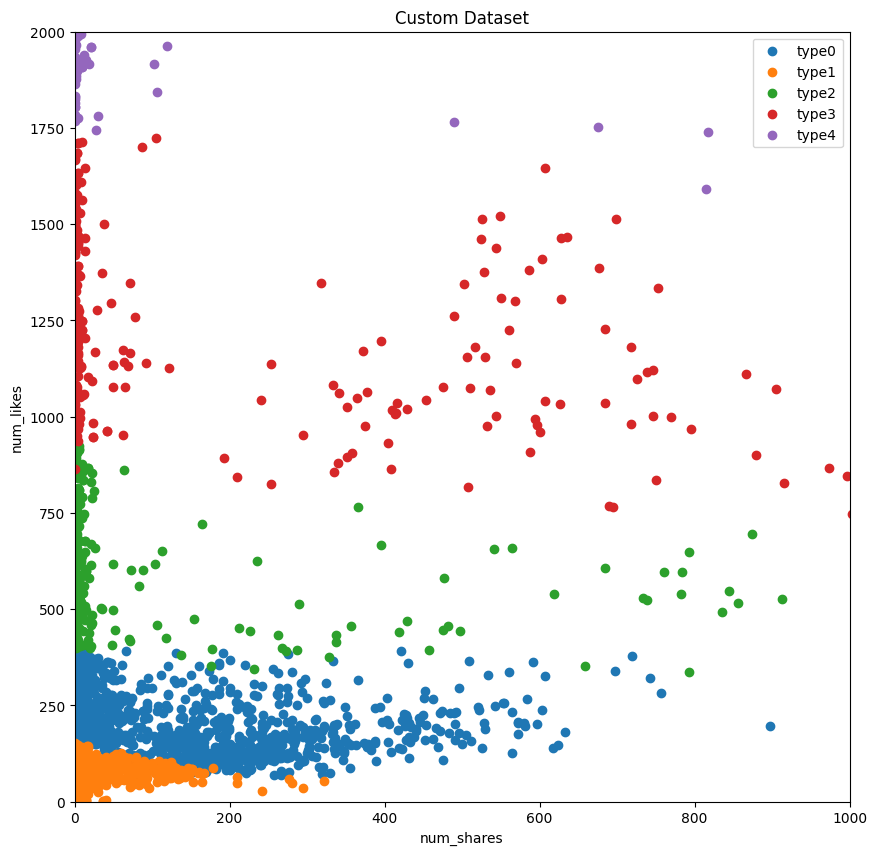

In [224]:
# 未标准化
main_custom_2d(X=X, y_pred=y_pred, type1_id=0, type2_id=1,
            x_lim=(0, 1000), y_lim=(0, 2000), figsize=(10, 10))

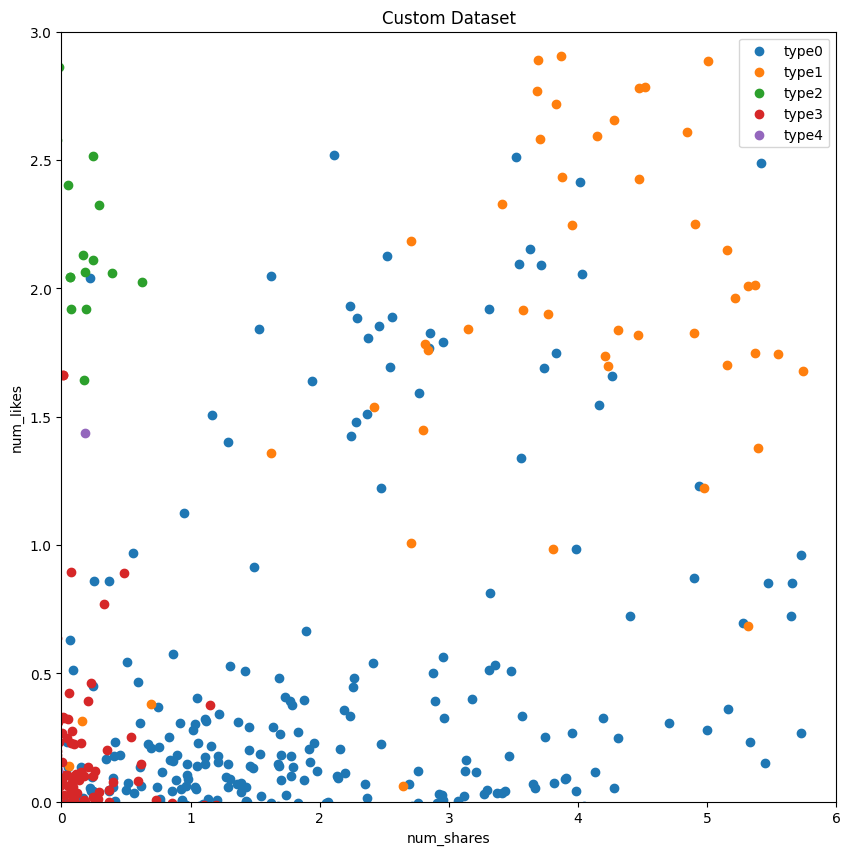

In [232]:
# 标准化
main_custom_2d(X=X_scaled, y_pred=y_pred_scaled, type1_id=0, type2_id=1,
            x_lim=(0, 6), y_lim=(0, 3), figsize=(10, 10))

## 泰国数据集可视化(3D)



In [226]:
def main_custom_3d(X, y_pred, type1_id, type2_id, type3_id, x_lim, y_lim, z_lim, figsize):
    """
    Designed for our dataset - 5 categories

    Args:
        X: dataset
        y_pred: inferenced result
        typeX_id: index of features in X(start from index 3 in `names`)
        X_lim: X axis ranging
        figsize: size of figure
    """

    # 可视化聚类效果
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection='3d')
    ax.set_xlim3d(*x_lim)
    ax.set_ylim3d(*y_lim)
    ax.set_zlim3d(*z_lim)
    ax.scatter3D(X[y_pred==0][:, type1_id], X[y_pred==0][:, type2_id], X[y_pred==0][:, type3_id])
    ax.scatter3D(X[y_pred==1][:, type1_id], X[y_pred==1][:, type2_id], X[y_pred==1][:, type3_id])
    ax.scatter3D(X[y_pred==2][:, type1_id], X[y_pred==2][:, type2_id], X[y_pred==2][:, type3_id])
    ax.scatter3D(X[y_pred==3][:, type1_id], X[y_pred==3][:, type2_id], X[y_pred==3][:, type3_id])
    ax.scatter3D(X[y_pred==4][:, type1_id], X[y_pred==4][:, type2_id], X[y_pred==4][:, type3_id])
    plt.title('Custom Dataset')
    ax.set_xlabel(names[3 + type1_id])
    ax.set_ylabel(names[3 + type2_id])
    ax.set_zlabel(names[3 + type3_id])

    plt.legend([f'type{i}' for i in range(5)])

    plt.show()

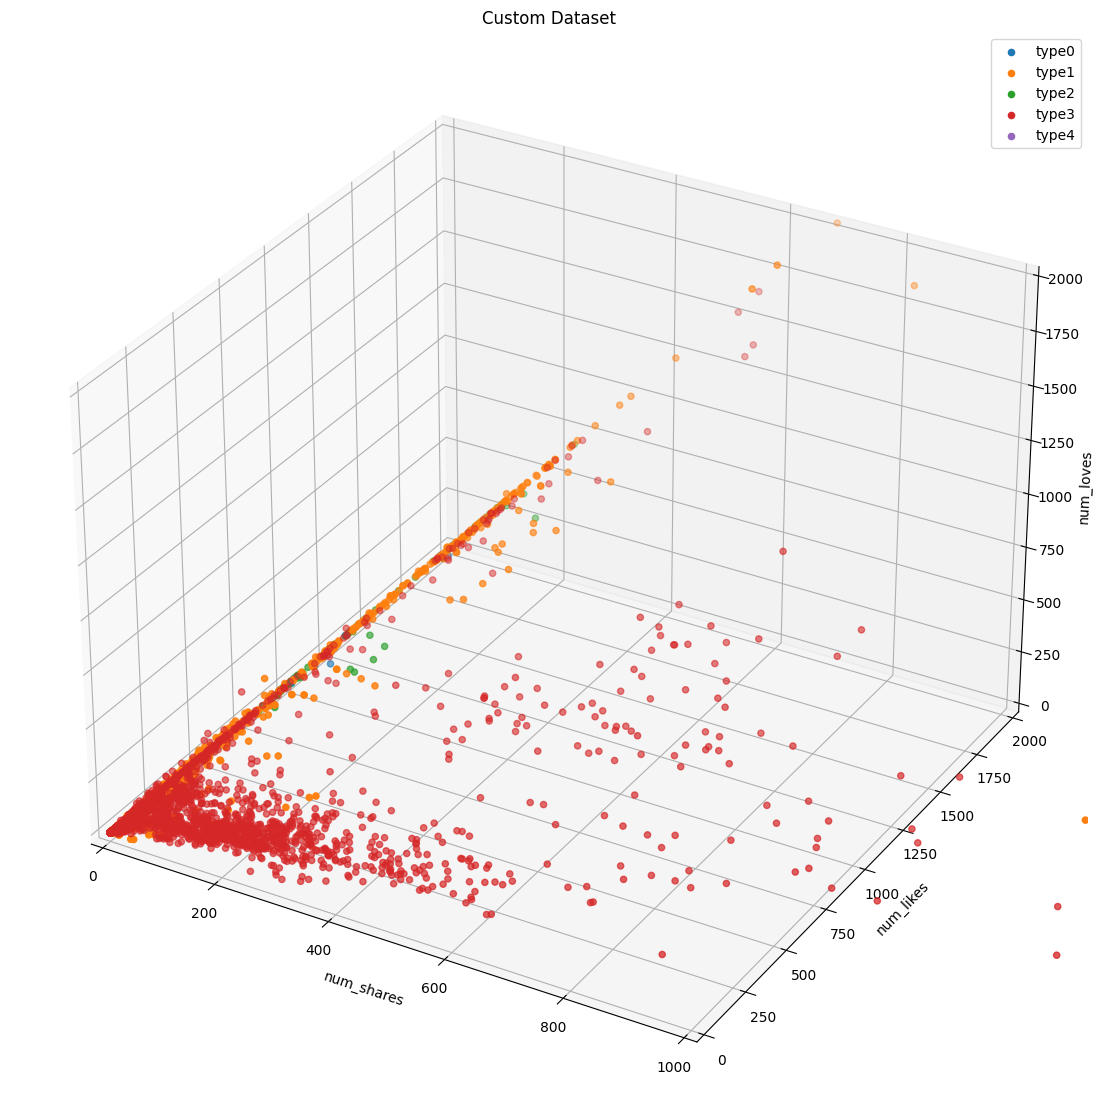

In [227]:
# 原始数据集
main_custom_3d(X=X, y_pred=np.array(data_clean['status_type']), type1_id=0, type2_id=1, type3_id=2,
            x_lim=(0, 1000), y_lim=(0, 2000), z_lim=(0, 2000), figsize=(14, 14))

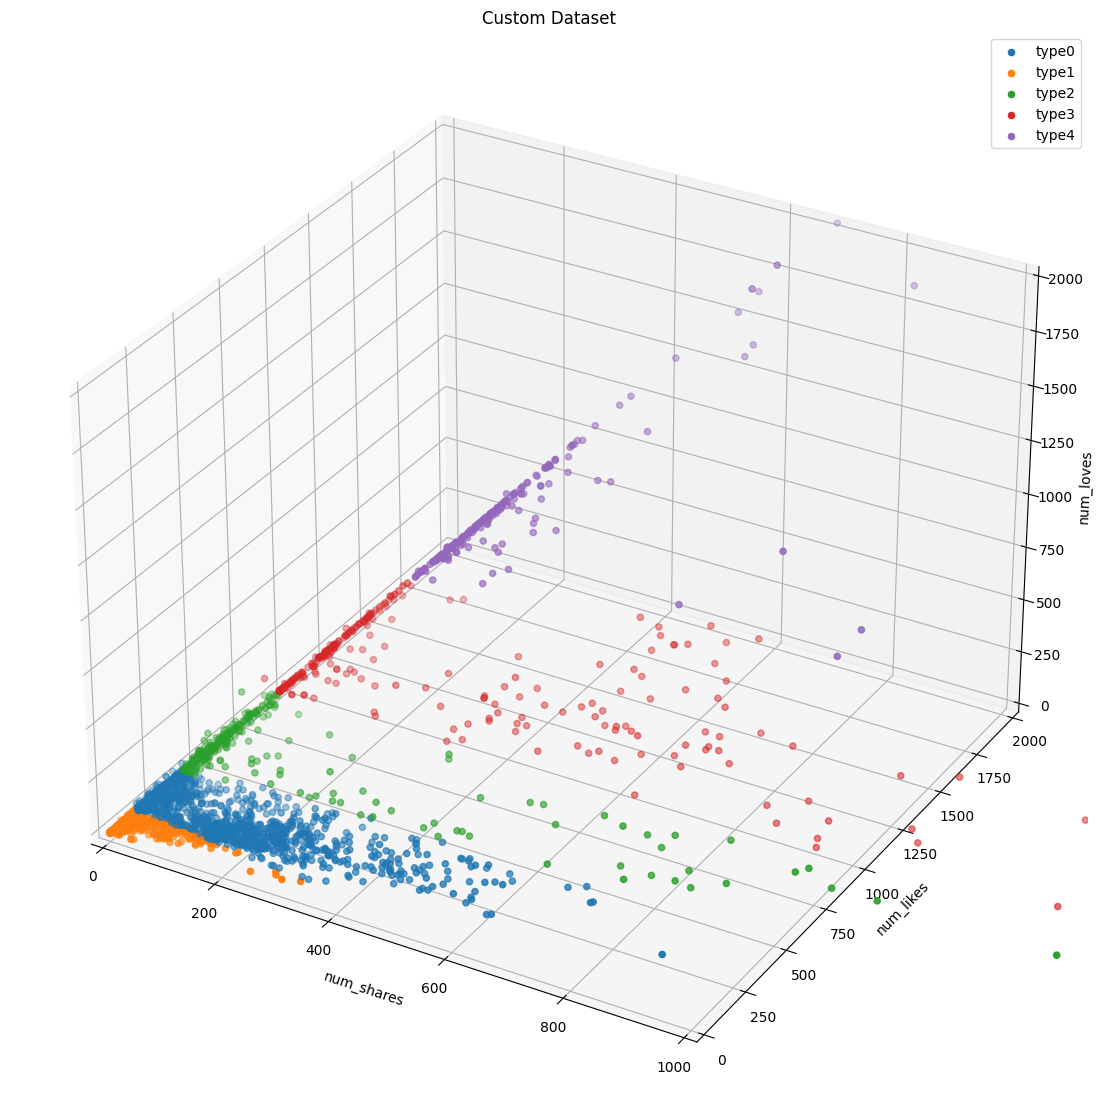

In [228]:
# 未标准化
main_custom_3d(X=X, y_pred=y_pred, type1_id=0, type2_id=1, type3_id=2,
            x_lim=(0, 1000), y_lim=(0, 2000), z_lim=(0, 2000), figsize=(14, 14))

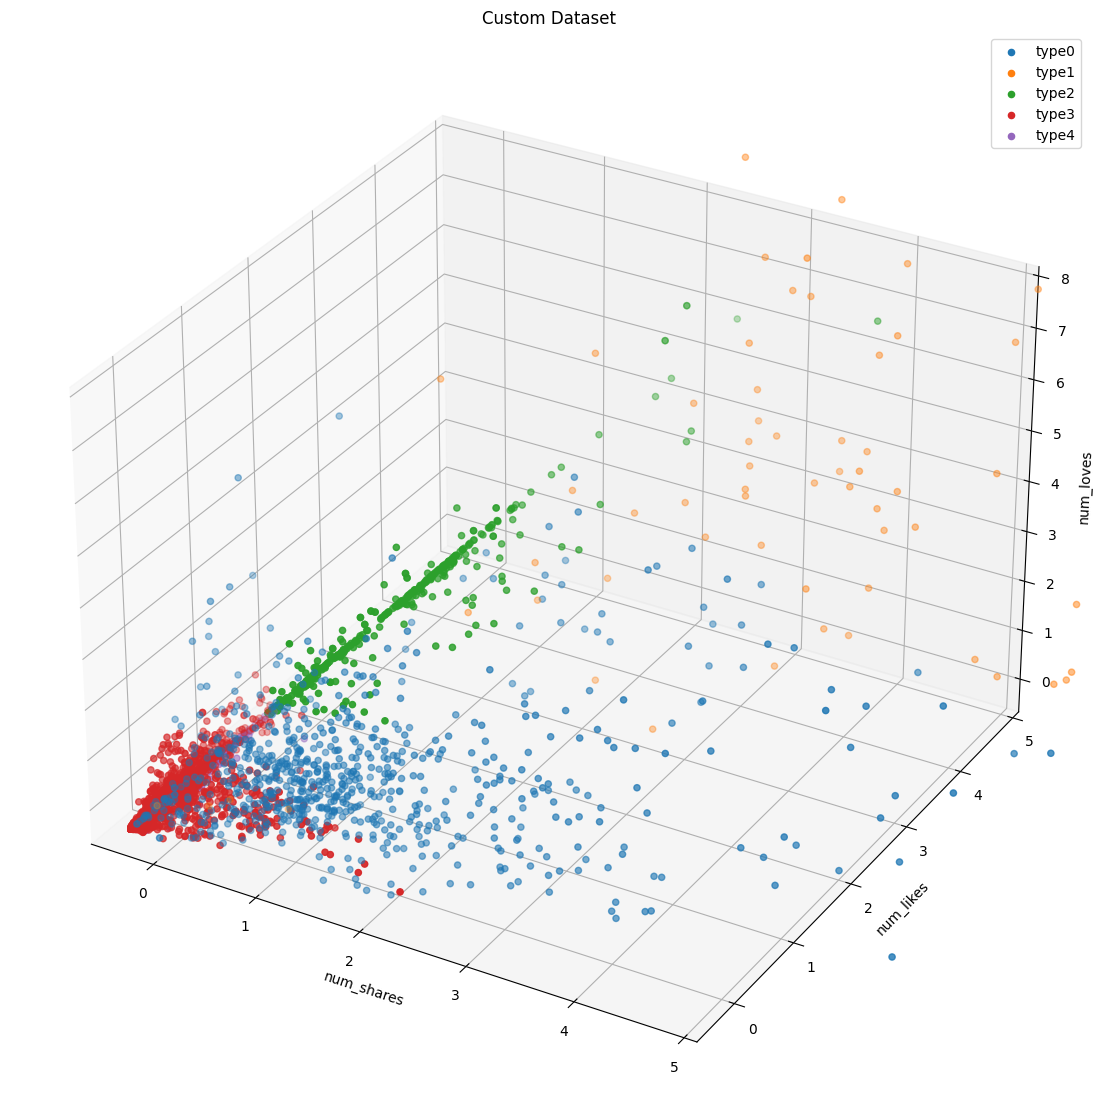

In [229]:
# 标准化
main_custom_3d(X=X_scaled, y_pred=y_pred_scaled, type1_id=0, type2_id=1, type3_id=2,
            x_lim=(-0.5, 5), y_lim=(-0.5, 5), z_lim=(-0.5, 8), figsize=(14, 14))

## 其他可视化

likes - loves - interesting (效果相对明显些)

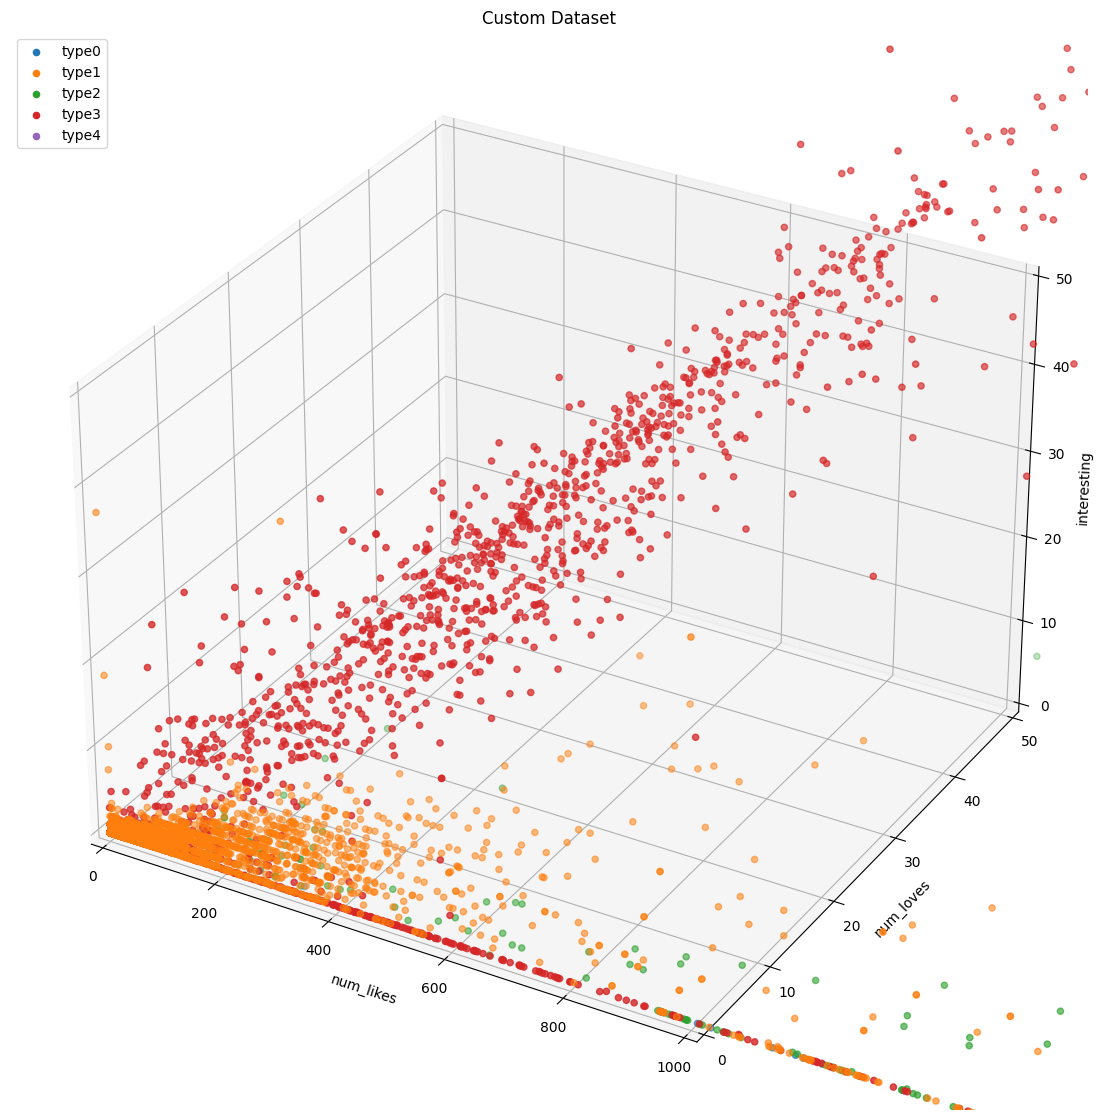

In [230]:
# 原始数据集
main_custom_3d(X=X, y_pred=np.array(data_clean['status_type']), type1_id=1, type2_id=2, type3_id=11,
            x_lim=(0, 1000), y_lim=(0, 50), z_lim=(0, 50), figsize=(14, 14))

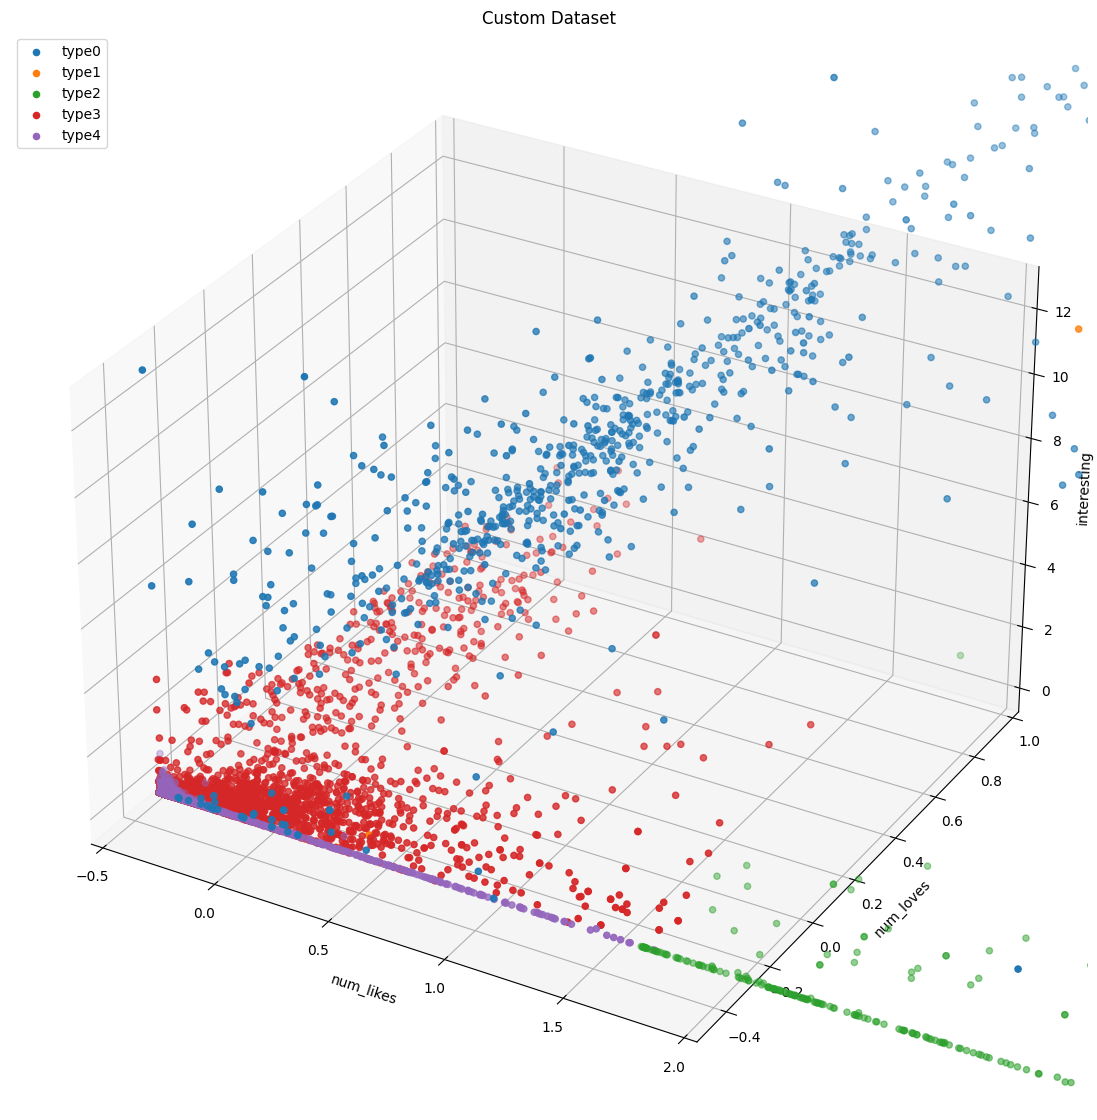

In [231]:
# 标准化
main_custom_3d(X=X_scaled, y_pred=y_pred_scaled, type1_id=1, type2_id=2, type3_id=11,
            x_lim=(-0.5, 2), y_lim=(-0.5, 1), z_lim=(-0.5, 13), figsize=(14, 14))